In [1]:
import pandas.api.types as ptypes
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

In [2]:
# read file
df_original=pd.read_csv("weatherHistory.csv")

df =df_original
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [4]:
df.drop(['Formatted Date', 'Summary','Precip Type','Loud Cover','Daily Summary'], axis=1,inplace=True)
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [5]:
df.dtypes

Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Pressure (millibars)        float64
dtype: object

In [6]:
df.rename(columns={'Apparent Temperature (C)':'y','Temperature (C)':'x1','Humidity':'x2','Wind Speed (km/h)':'x3','Wind Bearing (degrees)':'x4','Visibility (km)':'x5','Pressure (millibars)':'x6'},inplace=True)
df.head()

,x1,y,x2,x3,x4,x5,x6
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 7 columns):
x1    96453 non-null float64
y     96453 non-null float64
x2    96453 non-null float64
x3    96453 non-null float64
x4    96453 non-null float64
x5    96453 non-null float64
x6    96453 non-null float64
dtypes: float64(7)
memory usage: 5.2 MB


In [8]:
print(df.replace(0.0, df.median(), inplace=True))

None


In [9]:
df.min()

x1    -21.822222
y     -27.716667
x2      0.120000
x3      0.032200
x4      1.000000
x5      0.016100
x6    973.780000
dtype: float64

In [10]:
df.duplicated().sum()

73

In [11]:
df.drop_duplicates(keep=False,inplace=True) 
df.duplicated().sum()

0

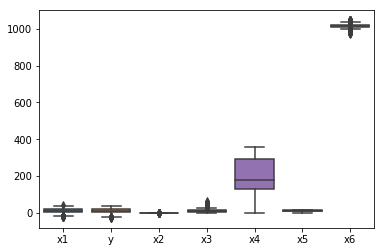

In [12]:
def Handling_missing_data(dataset):
    dataset.replace(np.NaN, dataset.mean(), inplace=True)
    return dataset

dataset=Handling_missing_data(df)
dataset.shape
sb.boxplot(data=dataset)

In [13]:
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if ptypes.is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
    return df

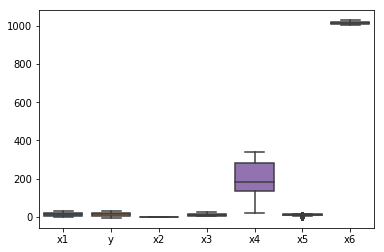

In [14]:
df= remove_outlier(df)
sb.boxplot(data=df)

In [15]:
# feature variable
# target = df['y']
# print ('Skewness is', target.skew())
# target = (np.sqrt((df['y'])))
# print("Mean is",target.mean(), ", Median is ", target.median(), "\nwhich shows that column data are skewed data")
# df['y'].hist()
# df['y'] = target

# print ('after removing Skewness is', target.skew())


In [16]:
def Split(data):
    train_set=0.70*len(data)
    train=int(train_set)
#         print(train)
    test_set=0.30*len(data)
    test=int(test_set)
    print(test)
        
    return train,test

In [17]:
train,test = Split(df)
train_data=df.head(train)
test_data=df.tail(test)

       
# print("train data\n",train_data)
# print("test data\n",test_data)

15426


In [18]:
# train_data=df.head(train)
# test_data=df.tail(test)
# print("train",train_data)
# print("test",test_data)

In [19]:
def Feature_Scaling(train_data):
        for column in train_data.columns:
            df[column] = ((train_data[column] - train_data[column].min()) /
                             (train_data[column].max() - train_data[column].min()))
        return train_data

In [20]:
df = Feature_Scaling(train_data)
# print(df)

In [21]:
# Separating the output and the parameters data frame
def separate(df):
    output = df.y
    return df.drop('y', axis=1), output
# df,output = separate(df)

train_data_x,train_data_y = separate(df)
test_data_x,test_data_y=separate(test_data)
train_data_y.shape
df.info()
# print("y data",output)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35994 entries, 0 to 65826
Data columns (total 7 columns):
x1    35994 non-null float64
y     35994 non-null float64
x2    35994 non-null float64
x3    35994 non-null float64
x4    35994 non-null float64
x5    35994 non-null float64
x6    35994 non-null float64
dtypes: float64(7)
memory usage: 3.4 MB


In [22]:
df.describe()

,x1,y,x2,x3,x4,x5,x6
count,35994.000000,35994.000000,35994.000000,35994.000000,35994.000000,35994.000000,35994.000000
mean,0.503631,0.521522,0.628043,0.355423,0.550817,0.621167,0.462044
std,0.248494,0.256641,0.269934,0.241740,0.291379,0.228127,0.218958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.308326,0.309442,0.433333,0.162547,0.367601,0.560093,0.301805
50%,0.507370,0.552937,0.683333,0.341573,0.514019,0.564761,0.460754
75%,0.701911,0.727868,0.850000,0.511610,0.822430,0.698950,0.612245
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
class MultiLinear_Regression:
    def __init__(self):
        # loads csv file
     
        self.alpha = 0.001
        self.epoch = 10000
    def Gradient_Descent(self, train_x_data, train_y_data,theta_vector):
        lists=[]
        ncols=6
        for length in range(self.epoch):
            hypo=np.dot(theta_vector.T,train_x_data.T)
            if hypo.any()==np.nan:
                print("sfhkje",length)
#             print(hypo)
            cf=(np.dot(np.subtract(hypo,train_y_data),train_x_data))
        print(cf.shape)
#             print(cf)
        theta_vector=np.subtract(theta_vector.T,np.divide((np.dot(self.alpha,cf)),len(train_x_data)))
        print(theta_vector.shape)
        print(theta_vector)
        return theta_vector
#             theta0 = theta0 - ((self.alpha * h1) / len(train_x_data))
#             theta1 = theta1 - ((self.alpha * h2) / len(train_x_data))
#             value=theta0
#             lists.append(value)
            
#         return [theta0, theta1],lists

    def Test_data(self, test_x_data, theta_vector):
        print(test_x_data.shape,theta_vector.shape)
        
        y_predict = np.dot(theta_vector,test_x_data.T)
        print(y_predict)
        return y_predict
    
    def accuracy(self, y_test_data, y_predict):
        total_error = 0
        for i in range(0, len(y_test_data)):
            total_error += abs((y_predict[i] - y_test_data[i]) / y_test_data[i])
        total_error = (total_error / len(y_test_data))
        accuracy = 1 - total_error
        return accuracy * 100


def main():
    obj = MultiLinear_Regression()
    # calling method by class object
    list1 = []
    
    x_train_data = np.array(train_data_x)
    y_train_data = np.array(train_data_y)

    x_test_data = np.array(test_data_x)
    print(x_test_data)
    y_test_data = np.array(test_data_y)
#     print(x_test_data)
    
    x_train_data = np.column_stack((np.ones((x_train_data.shape[0], 1)), x_train_data))
    
    x_test_data = np.column_stack((np.ones((x_test_data.shape[0], 1)), x_test_data))
    
    print("test x",x_test_data)
    x_size = 6
    theta_vector = np.ones(((x_size + 1), 1), dtype='f')
    
    print(theta_vector.shape)
    print(x_train_data.shape)
    
    
    theta_vector = obj.Gradient_Descent(x_train_data, y_train_data,theta_vector)
#     print(theta_vector)
    y_predict = obj.Test_data(x_test_data, theta_vector)
    print("y predict",y_predict)
    print(y_predict.shape)

    acc = obj.accuracy(y_test_data, y_predict.T)
    print("accuracy is", acc)

if __name__ == '__main__':
    main()
    

[[nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 ...
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]]
test x [[ 1. nan nan ... nan nan nan]
 [ 1. nan nan ... nan nan nan]
 [ 1. nan nan ... nan nan nan]
 ...
 [ 1. nan nan ... nan nan nan]
 [ 1. nan nan ... nan nan nan]
 [ 1. nan nan ... nan nan nan]]
(7, 1)
(35994, 7)
(1, 7)
(1, 7)
[[0.9964004  0.99822909 0.99768776 0.9986765  0.99792439 0.9977245
  0.99830712]]
(15426, 7) (1, 7)
[[nan nan nan ... nan nan nan]]
y predict [[nan nan nan ... nan nan nan]]
(1, 15426)
accuracy is [nan]
